# Homework 1
***
**Name**: $<$Sai Siddhi Akhilesh. Appala$>$ 
***

This assignment is due on Canvas by **09:30am on Thursday September 8th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

In [1]:
import argparse
import pandas as pd
import numpy as np
import pickle
from pathlib import Path

### Problem 1
***

The Function below should return the following attributes for the values within range [range_min, range_max] (both sides inclusive) in the ith column which are: 
- Number of objects
- The minimum value
- The maximum value
- The mean value
- The standard deviation value
- The Q1 value
- The median value
- The Q3 value
- The IQR value

Note:
- The data file is already at "data/dataset.csv". Please maintain this as it would be necessary while grading. You don't need to download it yourself
- Do not change the variable names of the returned values.
- After calculating each of those values, assign them to the corresponding value that is being returned.
- The col_ind can range from 0 - 8
- ONLY consider the values within [range_min, range_max] (both sides are INCLUSIVE) 

For example, if a column has value 1,2,3,4,5,6 and [range_min, range_max] = [2,4], only the values 2,3,4 will be used to calculate the attributes.

In [5]:
def calculate(dataFile, col_num, range_min, range_max):
    """
    Input Parameters:
        dataFile: The dataset file (in csv).
        col_num: The index of the column for which the various properties will be calculated.
        [range_min, range_max]: the range of the values to be considered for calculation
    Default value of 0,infinity,-infinity are assigned to all the variables as required. 
    """
    numObj, minValue, maxValue, mean, stdev, Q1, median, Q3, IQR = [0,"inf","-inf",0,0,0,0,0,0]

    data = pd.read_csv(dataFile)
    data_series = data.iloc[:,col_num]
    data_df = pd.DataFrame(data=data_series.values, columns=[data_series.name])
    col_name = data_df.columns[0]
    values = data_df.loc[(data_df[col_name] >= range_min) & (data_df[col_name] <=range_max)]
    numObj = len(values)
    minValue = values.min()[0]
    maxValue = values.max()[0]
    mean = values.mean()[0]
    stdev = values.std()[0]
    Q1 = np.percentile(values, 25, method = 'midpoint')
    median = values.median()[0]
    Q3 = np.percentile(values, 75, method = 'midpoint')
    IQR = Q3 - Q1
    #YOUR TASK: Write code to assign the values to the respective variables.
    return numObj, minValue, maxValue, mean, stdev, Q1, median, Q3, IQR

### Here are the unit tests. You don't need to modify them. Simply execute the cell and observe the output.

In [6]:
import unittest

class TestAttr(unittest.TestCase):
    def setUp(self):
        self.loc = "data/dataset.csv"
        file = open('data/testing', 'rb')
        self.data = pickle.load(file)
        file.close()
    
    def test0(self):
        """
        Test calculation result
        """
        column, range_min, range_max = self.data[0]
        result = calculate(self.loc, column, range_min, range_max)
        self.assertEqual(result[0],self.data[1][0])
        self.assertAlmostEqual(result[1],self.data[1][1], places = 1)
        self.assertAlmostEqual(result[2],self.data[1][2], places = 1)
        self.assertAlmostEqual(result[3],self.data[1][3], places = 1)
        self.assertAlmostEqual(result[4],self.data[1][4], places = 1)
        self.assertAlmostEqual(result[5],self.data[1][5], places = 1)
        self.assertAlmostEqual(result[6],self.data[1][6], places = 1)
        self.assertAlmostEqual(result[7],self.data[1][7], places = 1)
        self.assertAlmostEqual(result[8],self.data[1][8], places = 1)

tests = TestAttr()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

.
----------------------------------------------------------------------
Ran 1 test in 0.055s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

### [Part B] Scatter Plot. Use the cell below to add your code

Temperature
Humidity


Text(0.5, 1.0, 'scatter plot')

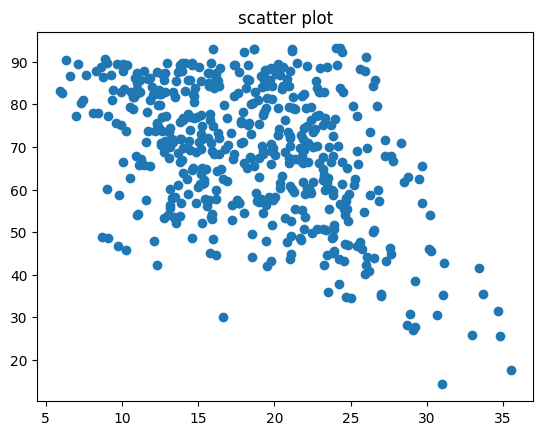

In [16]:
import matplotlib.pyplot as plt
df = pd.read_csv ('data/dataset.csv')
print (df.columns[1])
print (df.columns[2])
# Took only 500 samples as the graph is more distributed 
new_df = df.sample(n=500)
# value1 =  df.loc[(new_df['Temperature'] >= range_min) & (data_df['Humidity'] <=range_max)]
plt.scatter(new_df['Temperature'],new_df['Humidity'] )
# dataFrame.plot.scatter(x='Temperature', y='Humidity', title= "Scatter plot between two variables X and Y");

plt.title('scatter plot')